In [2]:
from qutip import *
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 100

In [3]:
from ipywidgets import IntProgress
from IPython.display import display

In [4]:
from Functions import make_wigners, make_animation

In [5]:
N = 20                              #Size of Hilbert space
a = destroy(N)                      #Define annihilation and creation operators
a_dag = create(N)
n = a_dag*a                         #Define number operator

0.0
0.0


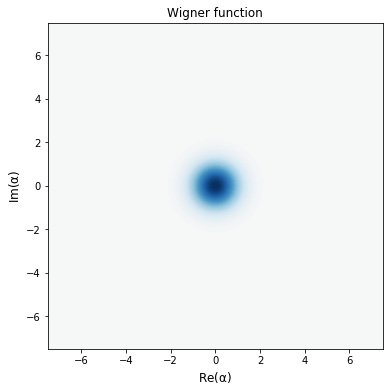

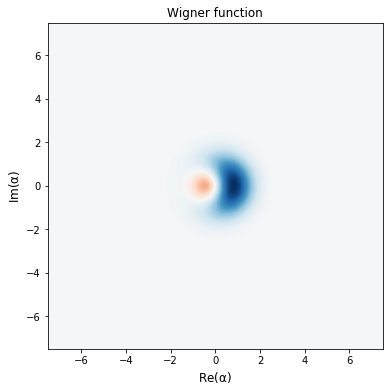

In [9]:
x = np.linspace(-6,6,200)


x2 = (a+a_dag)
p2 = 1j*(a_dag-a)

HO0 = basis(N,0)
HO1 = basis(N,1)

wigHO0 = wigner(HO0,x,x)

Sup1 = HO0 - HO1
Sup2 = HO0 + HO1

plot_wigner(Sup1+Sup2)
plot_wigner(Sup2)

print(expect(x2,Sup1-Sup2))
print(expect(p2,Sup1-Sup2))

0.002097506354163869
-0.001897507183334346
[ 2.09750635e-03 -1.89750718e-03 -4.00500054e-02 -1.20016663e-01
 -2.40008332e-01 -4.00005000e-01 -6.00003333e-01 -8.40002381e-01
 -1.12000179e+00 -1.44000139e+00 -1.80000111e+00 -2.20000091e+00
 -2.64000076e+00 -3.12000064e+00 -3.64000055e+00 -4.20000048e+00
 -4.80000042e+00 -5.44000037e+00 -6.12000033e+00 -6.84010555e+00]


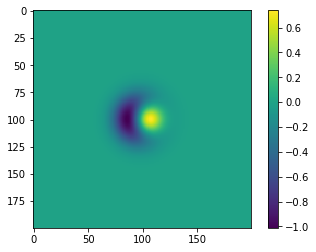

In [29]:
#Test 
#N = 20

K = 1/50
eps_r = 0.1*K
H_rot_rotdrive = -K*a_dag*a_dag*a*a + eps_r*(a_dag+a)      
Energies_rot_rotdrive, States_rot_rotdrive = H_rot_rotdrive.eigenstates()


psi0 = np.flip(States_rot_rotdrive)[0]
psi1 = np.flip(States_rot_rotdrive)[1]
E0 = np.flip(Energies_rot_rotdrive)[0]
E1 = np.flip(Energies_rot_rotdrive)[1]

#print(E0)
#print(E1)

wigsup = wigner(psi1+psi2,x,x)

dif = wigHO0 - wigsup
plt.imshow(dif)
plt.colorbar()

#print(expect(x2,psi1))
#print(expect(p2,psi1))
#print(np.flip(Energies_rot_rotdrive))

In [34]:
def interact_plot(phi = 0):
    extent = [x[0],x[-1],x[0],x[-1]]
    plt.figure(figsize=(6,6))
    Psi = (psi0*np.exp(-1j*E0*phi) + psi1*np.exp(-1j*E1*phi)).unit()
    wigner_func = wigner(Psi,x,x)
    plt.imshow(wigner_func, cmap = 'RdBu', vmin = -np.max(wigner_func), vmax = np.max(wigner_func), extent = extent, origin = 'lower');
    plt.ylabel(r'$Im(\alpha)$')
    plt.xlabel(r'$Re(\alpha)$')
    plt.colorbar()
    plt.axhline(linestyle = '--', color = 'red')
    plt.vlines(0, -6, 6, linestyle = '--', color = 'red')
    print(expect(x2, Psi))
    print(expect(p2, Psi))
    
    plt.figure(figsize=(4,4))
    plt.plot(x, np.sum(wigner_func, axis = 0))
    plt.vlines(0, 0, 20, linestyle = '--', color = 'red')

    
interact(interact_plot, phi =(0,400));

interactive(children=(IntSlider(value=0, description='phi', max=400), Output()), _dom_classes=('widget-interac…

Driven ground state is not exactly HO ground state. The drive causes a shift in the x-quadrature proportional to $\epsilon_r$. We see that time evolution of superposition of first two states of driven hamiltonian gives movement in p-quadrature. By calculating how operators evolve under time evolution we find that x is static and p is changing linearly in time as a result of the drive, which is observed in the plots. 

### Duffing Potential

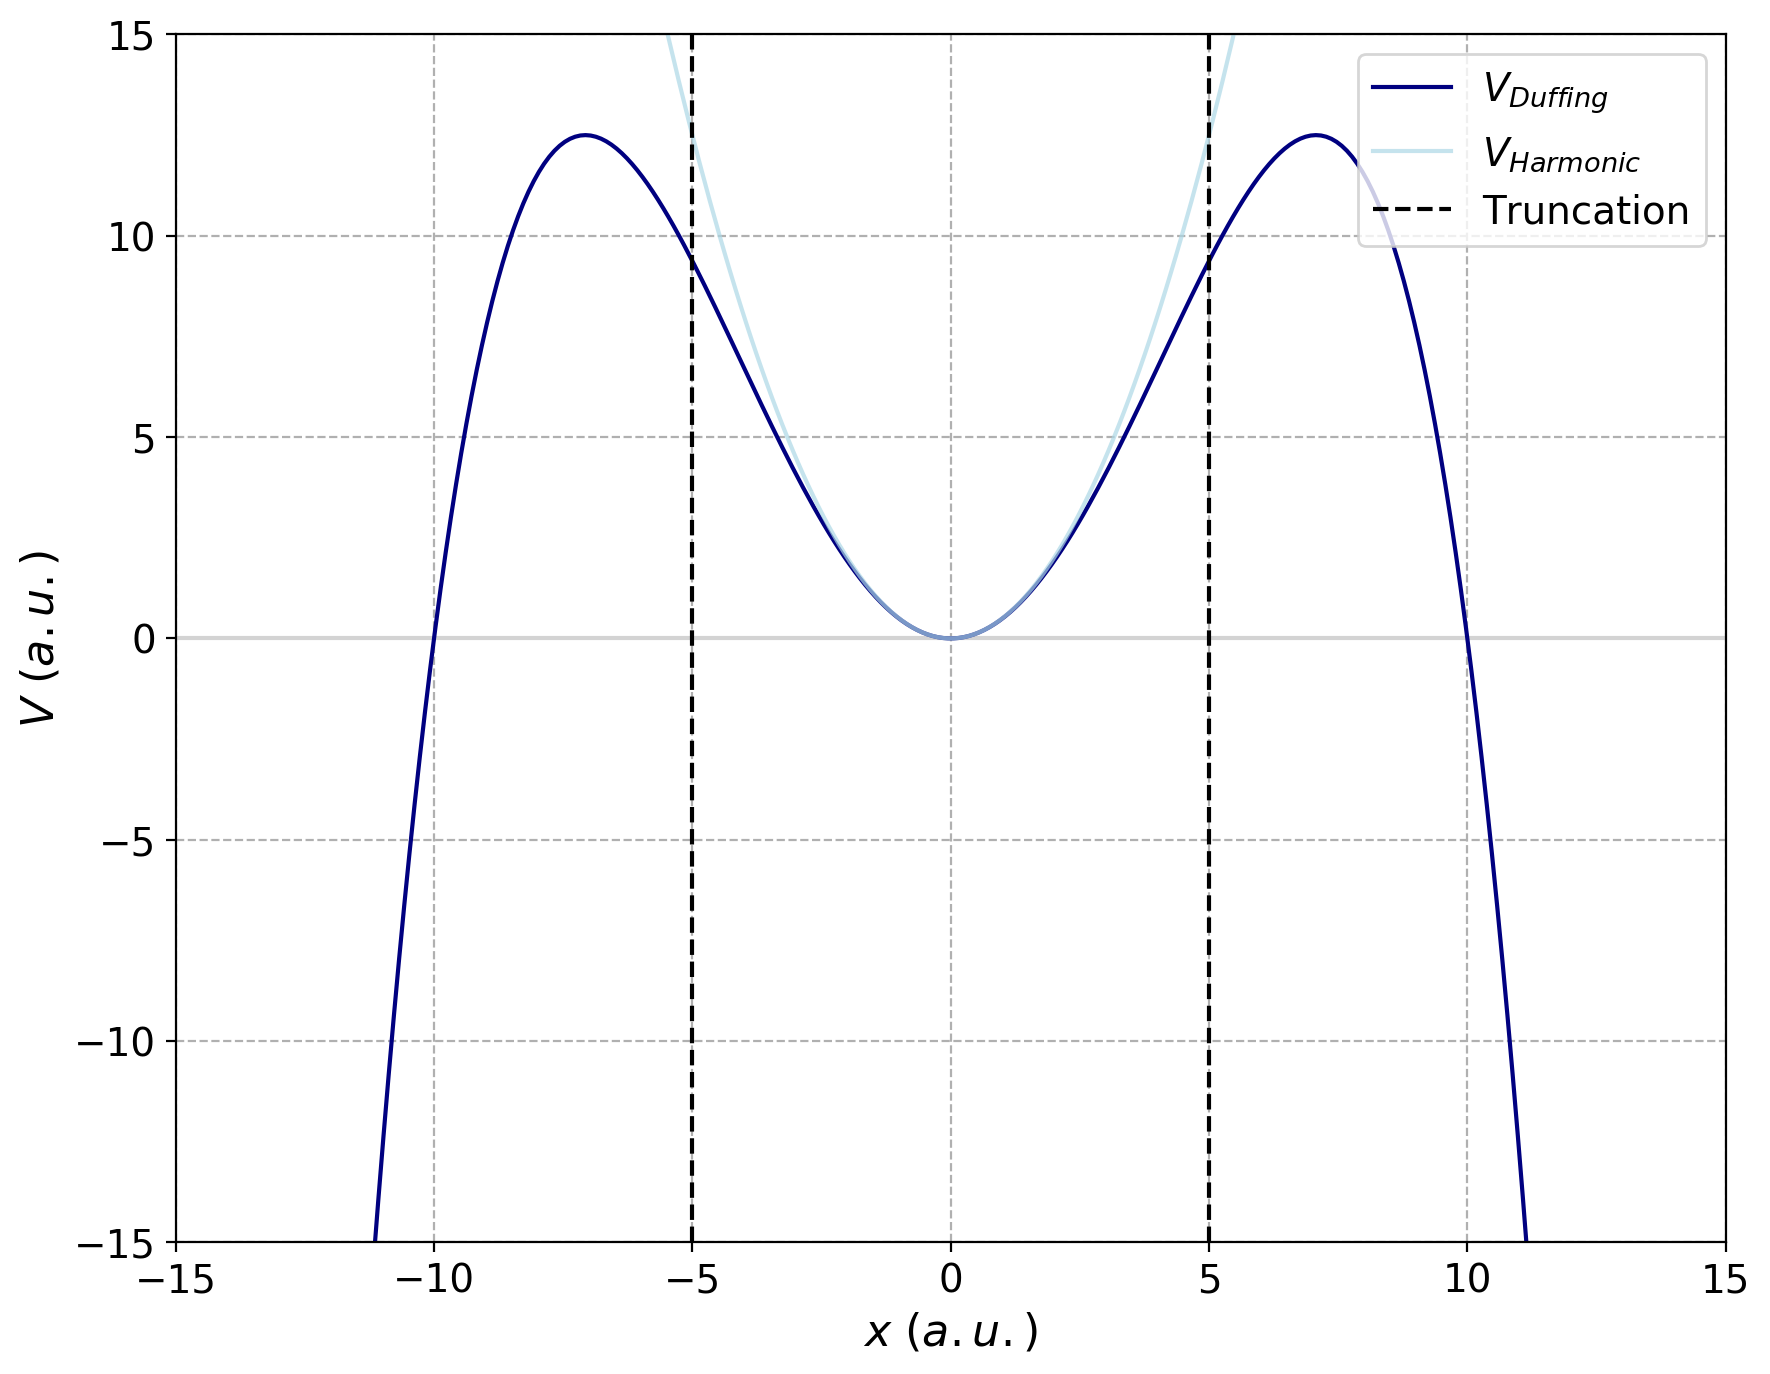

In [108]:
x = np.linspace(-20,20,400)

def V1(x):
    return 0.5*x**2-0.005*x**4

def V2(x):
    return 0.5*x**2

plt.figure(figsize = (10,8), dpi = 200)
#plt.axvline(0, c = 'dimgrey', ls = '--')
plt.axhline(0, c = 'lightgrey', ls = '-')
plt.grid(ls = '--', which = 'both')
plt.plot(x,V1(x), c = 'navy', label =r'$V_{Duffing}$')
plt.plot(x,V2(x), c = 'lightblue', label =r'$V_{Harmonic}$', ls = '-', alpha = 0.7)
plt.axvline(5, c = 'black', ls = '--', label = 'Truncation')
plt.axvline(-5, c = 'black', ls = '--')
plt.legend(fontsize = 14, loc = 'upper right')
plt.ylabel(r'$V$ $(a.u.)$', fontsize = 16)
plt.xlabel(r'$x$ $(a.u.)$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(-15,15);
plt.xlim(-15,15);